In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import *
from keras.layers import *
import tensorflow as tf


import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns


In [15]:
#paths of data
path_train='./Data/train'
path_test='./Data/test'

In [16]:
#names of calsses
name_classes=os.listdir('./Data/train')
print(name_classes)

['Covid', 'Normal', 'Viral Pneumonia']


In [17]:
#function to show one image each class
def plot_image(name_classes):
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(name_classes):
        image_path = path_train + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = tf.keras.preprocessing.image.load_img(first_image_path)
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255
        
        plt.subplot(1, 3, i + 1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

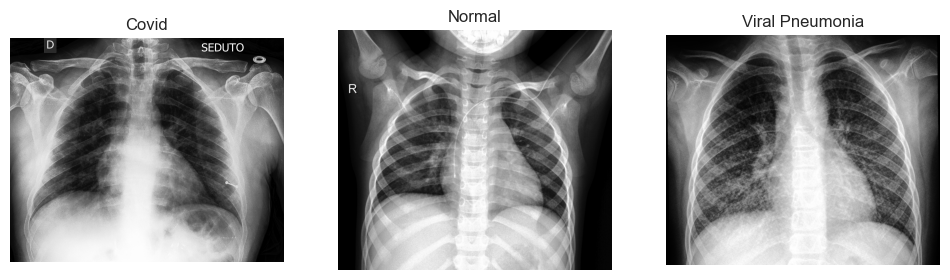

In [18]:
#show images 
plot_image(name_classes)

In [19]:
#image preprocessing --> convert each photo to array from 0 to 1
#scale
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)

In [20]:
#train data generator
train_data = data_generator.flow_from_directory(path_train,
                                                target_size = (224, 224),
                                                batch_size = 16
                                               )

Found 251 images belonging to 3 classes.


In [21]:
#test data generator
test_data = data_generator.flow_from_directory(path_test,
                                                target_size = (224, 224),
                                                batch_size = 1
                                               )

Found 66 images belonging to 3 classes.


In [22]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# CNN Model
model = tf.keras.Sequential()

# Add conv layer with filters, kernel, padding, activation, input shape
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                 activation='relu', input_shape=[224, 224, 3]))

# Add pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another conv layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                 activation='relu'))

# Add pooling layer
model.add(MaxPooling2D())

# Add another conv layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                 activation='relu'))

# Add pooling layer
model.add(MaxPooling2D())

# Add Flatten Layer ----> 1D
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

# Add output layer
model.add(Dense(3, activation='softmax'))


In [23]:
#model summary 
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,247,683 (12.39 MB)

 Trainable params: 3,247,683 (12.39 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#compile model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
             )

In [25]:
#fit model 
model_history = model.fit(train_data,
                         epochs = 5,
                         validation_data = test_data)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5544 - loss: 0.9431 - val_accuracy: 0.6061 - val_loss: 0.8489
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 785ms/step - accuracy: 0.8565 - loss: 0.3565 - val_accuracy: 0.9091 - val_loss: 0.3832
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 785ms/step - accuracy: 0.9167 - loss: 0.1879 - val_accuracy: 0.6970 - val_loss: 0.6556
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 818ms/step - accuracy: 0.9422 - loss: 0.1708 - val_accuracy: 0.9091 - val_loss: 0.3065
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 776ms/step - accuracy: 0.9774 - loss: 0.0501 - val_accuracy: 0.8030 - val_loss: 0.7216


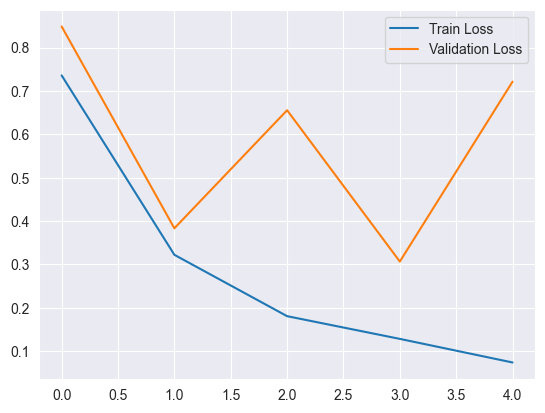

In [26]:
#Visuale for model error
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

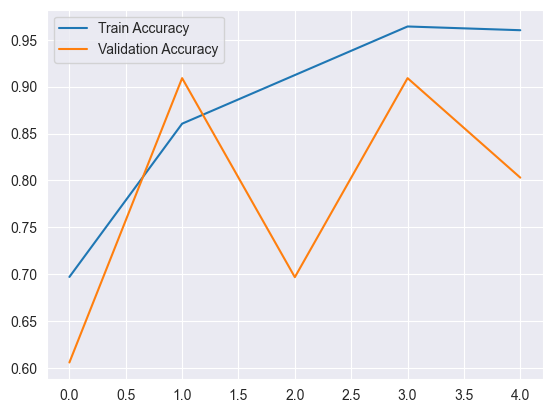

In [27]:
#Visuale for model accuracy

plt.plot(model_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

In [28]:
#model evaluate
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc*100:.2f}  Test Loss: {test_loss*100:.2f} ")

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8195 - loss: 0.6155
Test Accuracy: 80.30  Test Loss: 72.16 


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


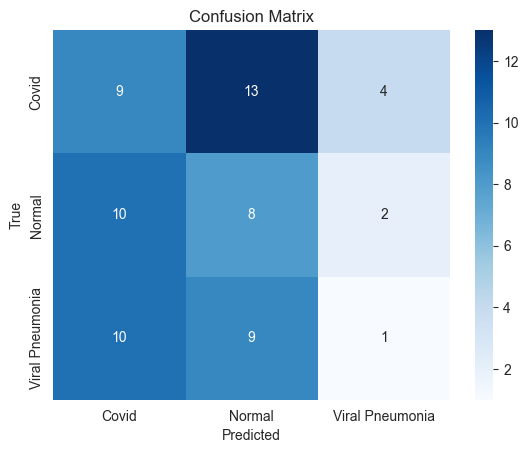

In [29]:
#confiution matrix
import numpy as np
y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data), axis=1)


conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
#save model
model.save('covid19_model.keras')

In [31]:
class_map = dict([value, key] for key, value in train_data.class_indices.items())

In [32]:
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [41]:
#model test 
import numpy as np
def prediction(test_image, actual_label):
    #load & Preprocessing image
    testing_img = tf.keras.preprocessing.image.load_img(test_image, target_size = (224,224))
    test_img_array =tf.keras.preprocessing.image.img_to_array(testing_img)/255
    
    test_img_input = test_img_array.reshape(1, test_img_array.shape[0],
                                           test_img_array.shape[1],
                                           test_img_array.shape[2])
    
    #make prediction
    predicted_class = np.argmax(model.predict(test_img_input))
    predicted_img = class_map[predicted_class]
    
    plt.figure(figsize = (4,4))
    plt.imshow(test_img_array)
    plt.title('Actual Label : {}, Predicted Label : {}'.format(actual_label, predicted_img))
    
    plt.grid()
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


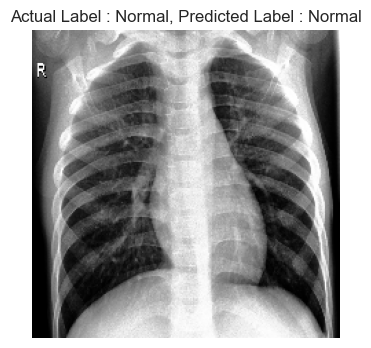

In [44]:
test_image = './Data/test/Normal/0122.jpeg'
prediction(test_image, actual_label = 'Normal')